In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
plt.rcParams.update({'font.size': 20})

from bandits import BanditMan

%load_ext autoreload
%autoreload 2

# Initialize the Lower Bound Stocchasitc Bandits

In [138]:
# np.random.seed(42)

run_time = 4000

bandit_prob = np.array([0.5, 0.5 + 0.07, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]).reshape(1, -1)

stock_bands = BanditMan(k=10, time_out=run_time, bandit_name='bernoulli', p=bandit_prob)

""" Run the simulations with the different solving algorithms """
uniform_sim = stock_bands.uniform_algo()

e_greedy_sim = stock_bands.e_greedy()

ucb_sim = stock_bands.ucb_one()

thomp_sim = stock_bands.thompsamp()

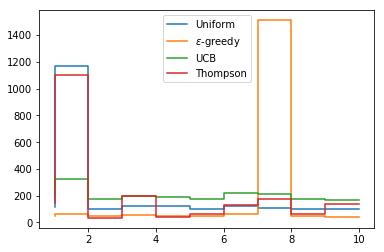

In [139]:
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(uniform_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(e_greedy_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(ucb_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(thomp_sim[0]))

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.show()

In [140]:
pickle.dump( uniform_sim, open( "uniform_simulation.p", "wb" ) )

data_uniform = pickle.load( open( "uniform_simulation.p", "rb" ) )

# Cumlative Reward


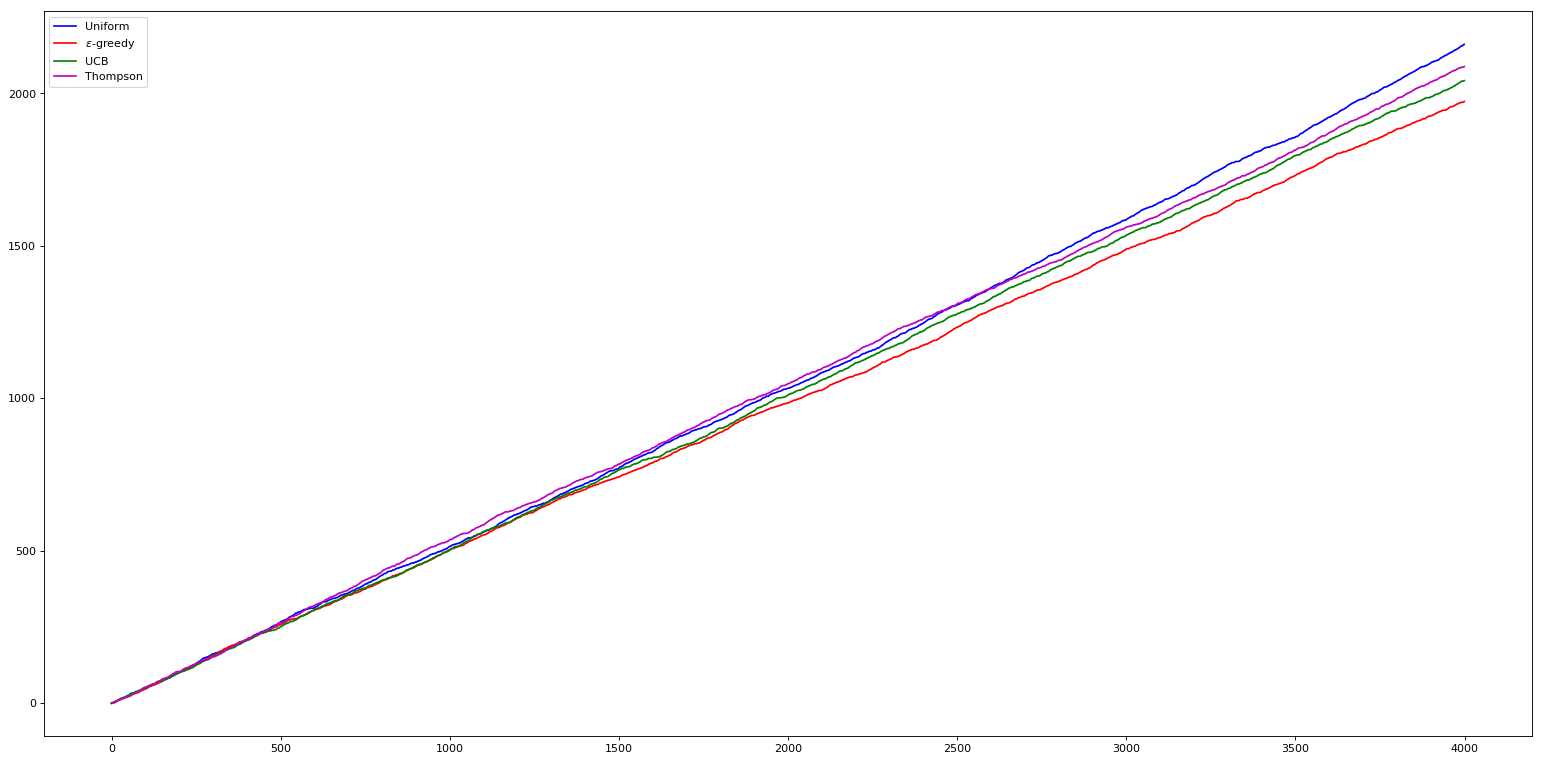

In [145]:
"""Find the cumlative rewards if different """
reward_mat = np.zeros((4, stock_bands.time_out))

for t in range(1, stock_bands.time_out):
    
    reward_mat[0, t] = stock_bands.algo_reward(uniform_sim[0][:, 0:t])
    reward_mat[1, t] = stock_bands.algo_reward(e_greedy_sim[0][:, 0:t])
    reward_mat[2, t] = stock_bands.algo_reward(ucb_sim[0][:, 0:t])
    reward_mat[3, t] = stock_bands.algo_reward(thomp_sim[0][:, 0:t])

cum_reward_fig = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(reward_mat[0, :], 'b')
plt.plot(reward_mat[1, :], 'r')
plt.plot(reward_mat[2, :], 'g')
plt.plot(reward_mat[3, :], 'm')

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.savefig('low_bound_reward.pdf')

plt.show()

# Regret vs Time

In [142]:
regret_mat = np.zeros((4, stock_bands.time_out))

for t in range(1, stock_bands.time_out):
    
    regret_mat[0, t] = stock_bands.regret_with_mean(uniform_sim, t)
    regret_mat[1, t] = stock_bands.regret_with_mean(e_greedy_sim, t)
    regret_mat[2, t] = stock_bands.regret_with_mean(ucb_sim, t)
    regret_mat[3, t] = stock_bands.regret_with_mean(thomp_sim, t)



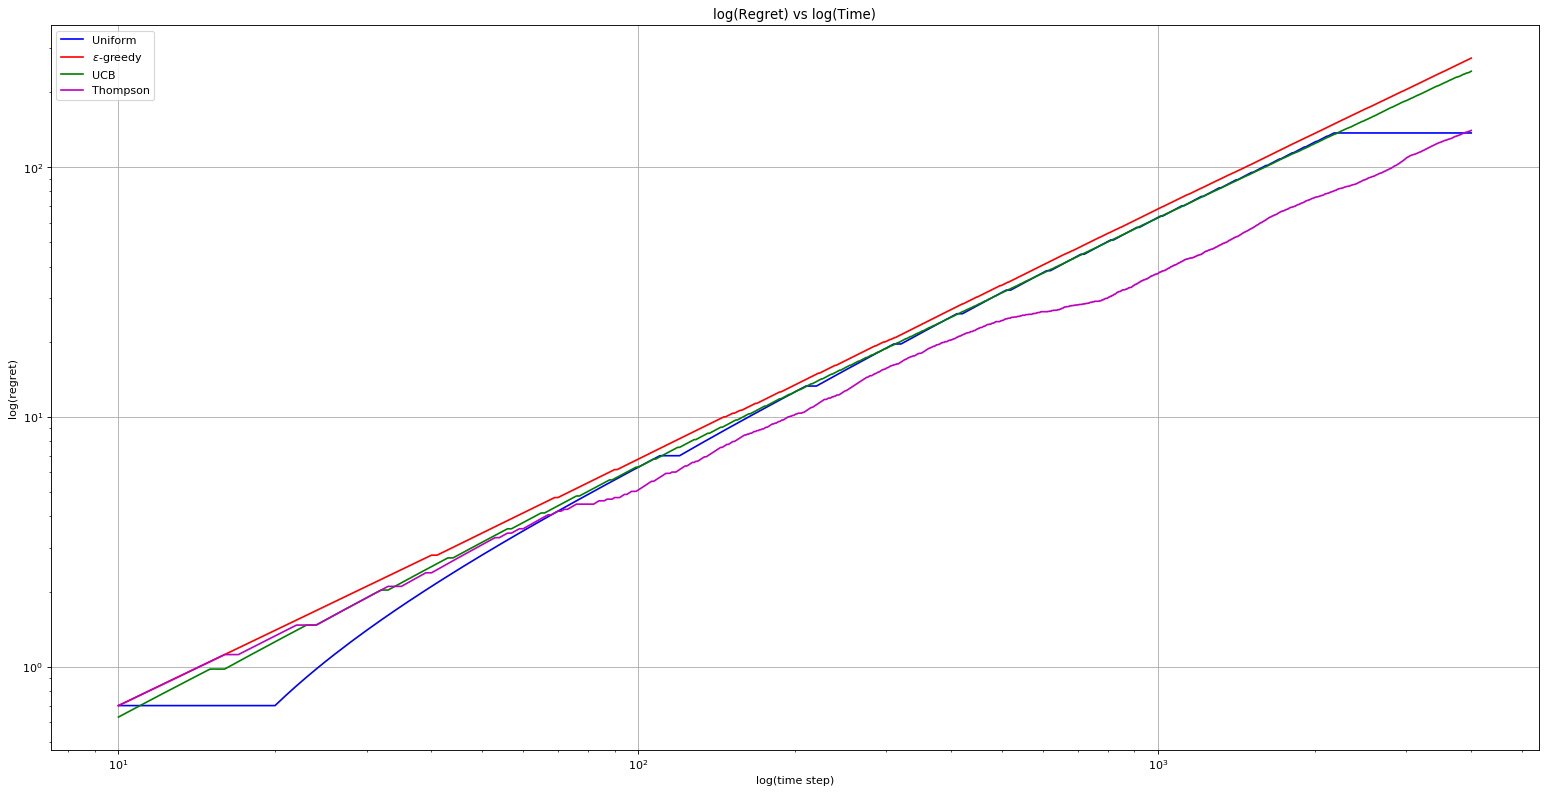

In [143]:
regret_fig = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

plot_start = 10

log_t = (np.linspace(plot_start, stock_bands.time_out, stock_bands.time_out-plot_start))

plt.loglog(log_t, (regret_mat[0, plot_start:]), 'b')
plt.loglog(log_t, (regret_mat[1, plot_start:]), 'r')
plt.loglog(log_t, (regret_mat[2, plot_start:]), 'g')
plt.loglog(log_t, (regret_mat[3, plot_start:]), 'm')

# plt.loglog(log_t, log_t ** (2/3))

plt.grid(True)

plt.title('log(Regret) vs log(Time)')
plt.xlabel('log(time step)')
plt.ylabel('log(regret)')

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))
plt.savefig('low_bound_regret.pdf')
plt.show()

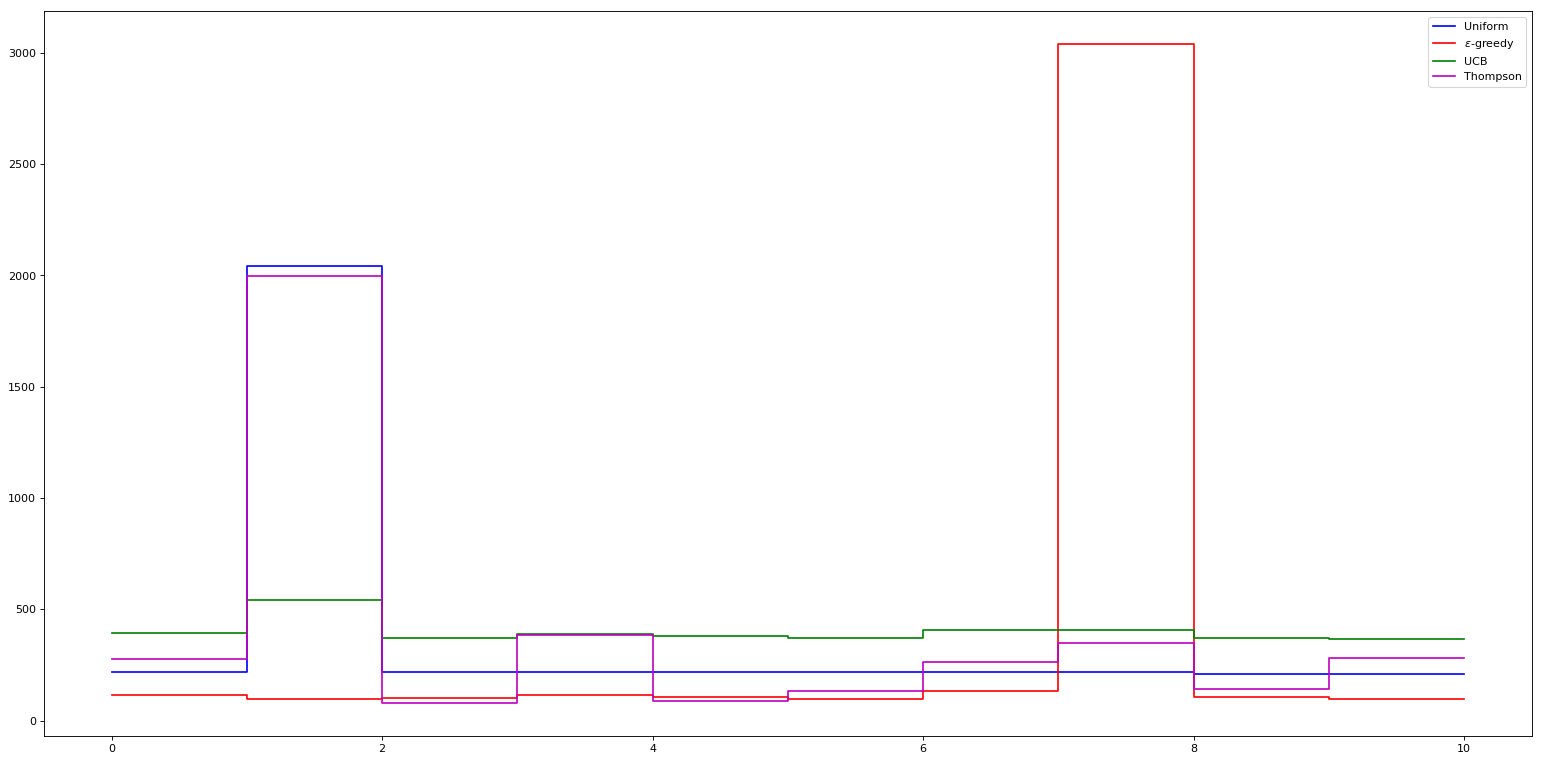

In [144]:
hist_figure = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

hist_uni = stock_bands.count_occur(uniform_sim[1])
hist_uni = np.vstack((hist_uni[0, 0], hist_uni))

hist_e_greedy = stock_bands.count_occur(e_greedy_sim[1])
hist_e_greedy = np.vstack((hist_e_greedy[0, 0], hist_e_greedy))

hist_ucb = stock_bands.count_occur(ucb_sim[1])
hist_ucb = np.vstack((hist_ucb[0, 0], hist_ucb))

hist_thomp = stock_bands.count_occur(thomp_sim[1])
hist_thomp = np.vstack((hist_thomp[0, 0], hist_thomp))

plt.step(np.linspace(0, 10, 11), hist_uni, 'b')
plt.step(np.linspace(0, 10, 11), hist_e_greedy, 'r')
plt.step(np.linspace(0, 10, 11), hist_ucb, 'g')
plt.step(np.linspace(0, 10, 11), hist_thomp, 'm')

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.savefig('low_bound_hist.pdf')

plt.show()

